In [9]:
import pandas as pd
import json

In [52]:
df = pd.read_csv("non_duplicates.csv", sep="\t", encoding="utf-8")

# List the authors that make up 80% of the total number of messages
print(len(df[df["message_count"].cumsum() <= df["message_count"].sum() * 0.80]))

2056


In [5]:
df = pd.read_csv("ConsolidatedImageHashAuthorsLinks.csv", sep="\t", encoding="utf-8")

# Remove author_hash, new_path, image_hash, message_count columns
df = df.drop(
    columns=["author_hash", "new_path", "image_hash", "message_count"], axis=1
)

df.to_csv("authors_to_links.csv", sep="\t", encoding="utf-8", index=False)

In [26]:
df = pd.read_csv("authors_to_links.csv", sep="\t", encoding="utf-8")

d = df.to_dict("records")

# Make a dictionary with author as key and link as value
author_to_link = {}
for row in d:
    author_to_link[row["author"]] = row["link"]

print(author_to_link)

{'Deleted User#0000': 'https://i.imgur.com/4TndmO6.png', 'Rebaz#9459': 'https://i.imgur.com/lWr0UXT.png', 'S A#9216': 'https://i.imgur.com/MgAZH4p.png', 'Vexed#8158': 'https://i.imgur.com/PjZweDx.png', 'Don Quixote de la Manhaj#4763': 'https://i.imgur.com/W64DrYa.png', 'Kurdi#8408': 'https://i.imgur.com/HqpIY3q.png', 'عبد البر | ʿAbd al-Barr#4955': 'https://i.imgur.com/UYuqFEV.png', 'Ging#6700': 'https://i.imgur.com/Gn0ykNq.gif', 'ThewyZUlu#4550': 'https://i.imgur.com/0ipBBBg.png', 'Talip#1533': 'https://i.imgur.com/B1nheMl.png', 'Fascondo#0786': 'https://i.imgur.com/HptDEKn.png', 'Yusha#9679': 'https://i.imgur.com/ebbb74J.png', 'The Murcian#2314': 'https://i.imgur.com/agQLl1o.png', 'Mockingbird#9352': 'https://i.imgur.com/v56ytyH.png', 'Muhammad#5744': 'https://i.imgur.com/BdcKEGi.png', 'Deleted User 5fe7590v#5789': 'https://i.imgur.com/Pixkd65.png', 'ameen#0821': 'https://i.imgur.com/YaFqIp2.png', 'よそもの#0453': 'https://i.imgur.com/VyKfhOV.png', 'Muhammad Umar Mustafa#0853': 'https://

In [28]:
the_file = "archived_channels/social-sciences.json"

with open(the_file, "r", encoding="utf-8") as f:
    channel = json.loads(f.read())
    
for message in channel:
    message["avatar_url"] = author_to_link[message["author"]]
        
with open(the_file, "w", encoding="utf-8") as f:
    f.write(json.dumps(channel, indent=4))

In [ ]:
the_file = "archived_channels/islamic-discourse.json"

with open(the_file, "r", encoding="utf-8") as f:
    channel = json.loads(f.read())
    
# for message in channel:

message_count
1      305
2      192
3      140
4      120
5      104
      ... 
493      1
497      1
505      1
507      1
261      1
Name: count, Length: 442, dtype: int64


<Axes: xlabel='message_count'>

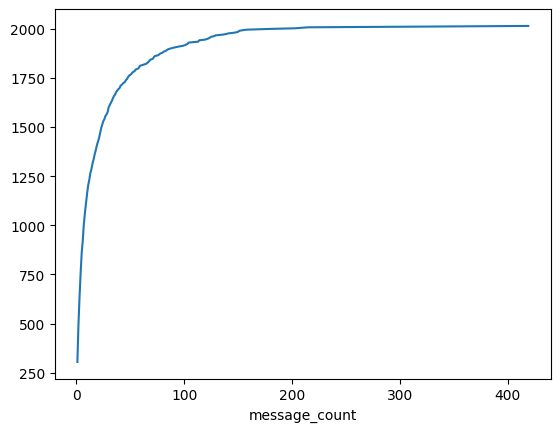

In [10]:
# For each message count, count how many authors have that message count

print(df["message_count"].value_counts())

# Plot the message count distribution up to the first 50 messages

# df["message_count"].value_counts().head(50).plot.bar()

# plot percentile distribution

df["message_count"].value_counts().head(100).sort_index().cumsum().plot()

